In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

np.set_printoptions(linewidth=np.inf, suppress=True, precision=2)

In [2]:
import mitosheet

In [3]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

pyo.init_notebook_mode(connected=True)

In [4]:
with open('Data/Data12/GB_result_12I1O.pkl', 'rb') as f:
    result = pickle.load(f)

In [5]:
result

[(0,
  'gradientboostingregressor',
  ['Input 01',
   'Input 08',
   'Input 03',
   'Input 09',
   'Input 06',
   'Input 07',
   'Input 04',
   'Input 11',
   'Input 02',
   'Input 12',
   'Input 05',
   'Input 10'],
  {'r2': 0.9365859623389753,
   'neg_root_mean_squared_error': -0.03160467707981062,
   'total_zeros': 7203}),
 (1,
  'gradientboostingregressor',
  ['Input 01',
   'Input 06',
   'Input 08',
   'Input 03',
   'Input 12',
   'Input 04',
   'Input 07',
   'Input 11',
   'Input 05',
   'Input 10',
   'Input 02',
   'Input 09'],
  {'r2': 0.96980598298908,
   'neg_root_mean_squared_error': -0.01896877051970531,
   'total_zeros': 3765}),
 (2,
  'gradientboostingregressor',
  ['Input 01',
   'Input 06',
   'Input 04',
   'Input 12',
   'Input 03',
   'Input 08',
   'Input 05',
   'Input 07',
   'Input 11',
   'Input 09',
   'Input 10',
   'Input 02'],
  {'r2': 0.9701486177450065,
   'neg_root_mean_squared_error': -0.019407200891519295,
   'total_zeros': 4154}),
 (3,
  'gradientb

In [6]:
df_r = pd.DataFrame(result)
df_r

,0,1,2,3
0,0,gradientboostingregressor,"[Input 01, Input 08, Input 03, Input 09, Input 06, Input 07, Input 04, Input 11, Input 02, Input 12, Input 05, Input 10]","{'r2': 0.9365859623389753, 'neg_root_mean_squared_error': -0.03160467707981062, 'total_zeros': 7203}"
1,1,gradientboostingregressor,"[Input 01, Input 06, Input 08, Input 03, Input 12, Input 04, Input 07, Input 11, Input 05, Input 10, Input 02, Input 09]","{'r2': 0.96980598298908, 'neg_root_mean_squared_error': -0.01896877051970531, 'total_zeros': 3765}"
2,2,gradientboostingregressor,"[Input 01, Input 06, Input 04, Input 12, Input 03, Input 08, Input 05, Input 07, Input 11, Input 09, Input 10, Input 02]","{'r2': 0.9701486177450065, 'neg_root_mean_squared_error': -0.019407200891519295, 'total_zeros': 4154}"
3,3,gradientboostingregressor,"[Input 01, Input 06, Input 04, Input 12, Input 09, Input 05, Input 07, Input 11, Input 03, Input 10, Input 08, Input 02]","{'r2': 0.9712688150323772, 'neg_root_mean_squared_error': -0.019407069607957135, 'total_zeros': 3138}"
4,4,gradientboostingregressor,"[Input 01, Input 06, Input 04, Input 12, Input 09, Input 05, Input 10, Input 11, Input 07, Input 03, Input 08, Input 02]","{'r2': 0.9719848144422911, 'neg_root_mean_squared_error': -0.01933521378585893, 'total_zeros': 2661}"
...,...,...,...,...
6,6,gradientboostingregressor,"[Input 01, Input 06, Input 04, Input 12, Input 09, Input 05, Input 10, Input 07, Input 03, Input 11, Input 02, Input 08]","{'r2': 0.9721059310807837, 'neg_root_mean_squared_error': -0.019488438980616207, 'total_zeros': 2965}"
7,7,gradientboostingregressor,"[Input 01, Input 06, Input 04, Input 09, Input 12, Input 05, Input 10, Input 07, Input 11, Input 08, Input 03, Input 02]","{'r2': 0.9702606230159432, 'neg_root_mean_squared_error': -0.019958744620245127, 'total_zeros': 2868}"
8,8,gradientboostingregressor,"[Input 01, Input 06, Input 04, Input 12, Input 05, Input 09, Input 10, Input 07, Input 11, Input 03, Input 02, Input 08]","{'r2': 0.9724805966728987, 'neg_root_mean_squared_error': -0.01914965871673812, 'total_zeros': 2417}"
9,9,gradientboostingregressor,"[Input 01, Input 06, Input 04, Input 12, Input 09, Input 05, Input 10, Input 11, Input 07, Input 08, Input 03, Input 02]","{'r2': 0.9711376012168387, 'neg_root_mean_squared_error': -0.01968460300431094, 'total_zeros': 2731}"


In [7]:
r2 = df_r[3].apply(pd.Series)
r2

,r2,neg_root_mean_squared_error,total_zeros
0,0.936586,-0.031605,7203.0
1,0.969806,-0.018969,3765.0
2,0.970149,-0.019407,4154.0
3,0.971269,-0.019407,3138.0
4,0.971985,-0.019335,2661.0
...,...,...,...
6,0.972106,-0.019488,2965.0
7,0.970261,-0.019959,2868.0
8,0.972481,-0.019150,2417.0
9,0.971138,-0.019685,2731.0


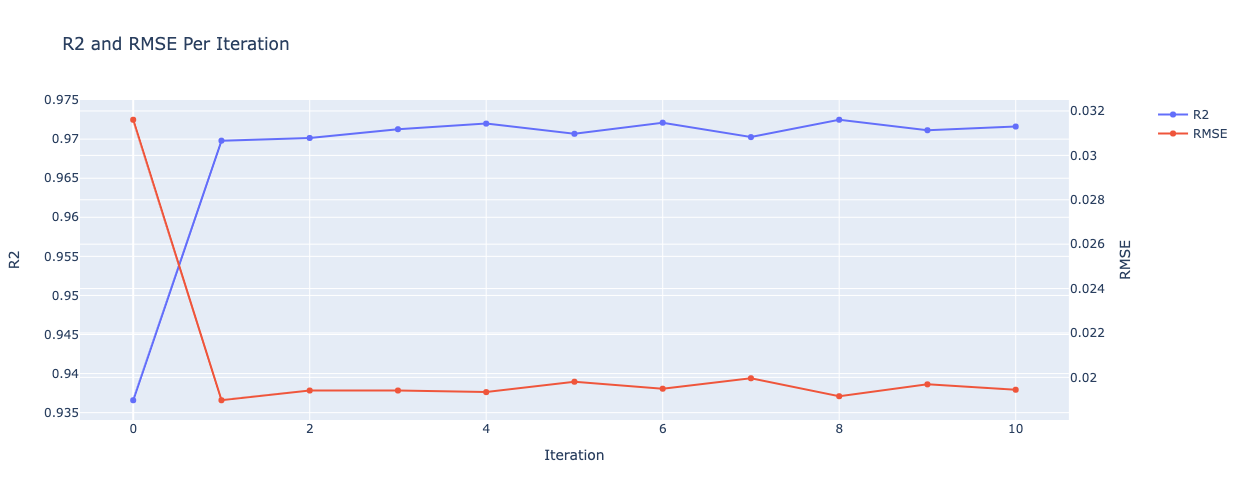

In [8]:
fig = make_subplots(specs=[[{"secondary_y": True}]])


fig.add_trace(go.Scatter(y =  r2.r2, x = r2.index, name = "R2"),  secondary_y=False)
fig.add_trace(go.Scatter(y =  r2.neg_root_mean_squared_error * -1, x = r2.index, name = "RMSE"), secondary_y=True)


fig.update_layout(title="R2 and RMSE Per Iteration",
                    xaxis_title='Iteration',
                    yaxis_title='R2',
                    yaxis2_title='RMSE',
                   autosize=False,
                   width=900,
                  height=500,
                 )
fig.update_layout(title_text = "R2 and RMSE Per Iteration")

fig.show()

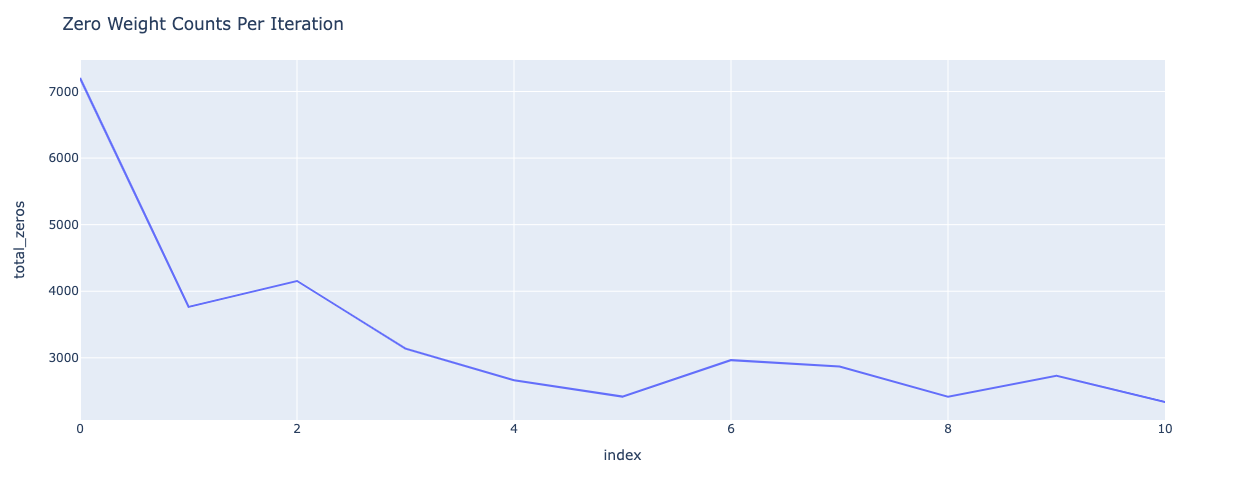

In [9]:
fig = px.line(r2, x=r2.index, y=r2.total_zeros)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Zero Weight Counts Per Iteration",
)

fig.show()

In [10]:
df_imp = pd.read_pickle('Data/Data12/GB_12I1O_df_imp.pkl')
df_imp

,Feature Name,Importance,index,Zero_Count,Iteration
0,Output 01,0.579320,Output 01,0,0
1,Input 01,0.064559,Input 01,330,0
2,Input 08,0.056970,Input 08,428,0
3,Input 03,0.048775,Input 03,249,0
4,Input 09,0.045691,Input 09,599,0
...,...,...,...,...,...
138,Input 10,0.005973,Input 10,166,10
139,Input 11,0.005259,Input 11,175,10
140,Input 02,0.003949,Input 02,813,10
141,Input 08,0.003193,Input 08,196,10


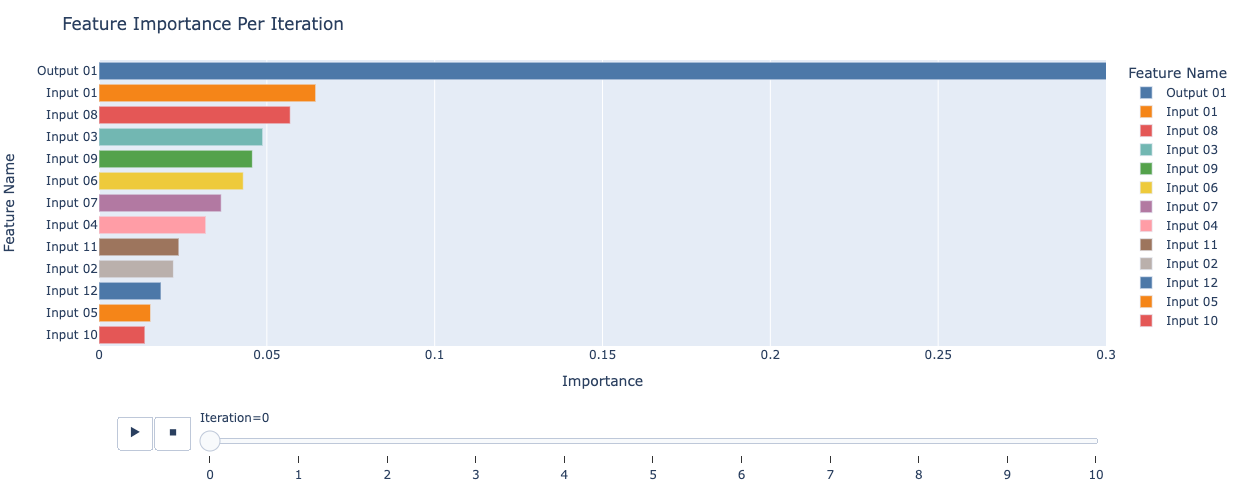

In [11]:
fig = px.bar(
    df_imp,
    y="Feature Name",
    x="Importance",
    color="Feature Name",
    color_discrete_sequence=px.colors.qualitative.T10,
    animation_frame="Iteration",
    animation_group="Feature Name",
    orientation="h",
    range_x=[0,0.3]
)

fig.update_yaxes(categoryorder='total ascending')

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Feature Importance Per Iteration",
    #paper_bgcolor='#2d3035',
    #plot_bgcolor='#2d3035', 
)


fig.show()

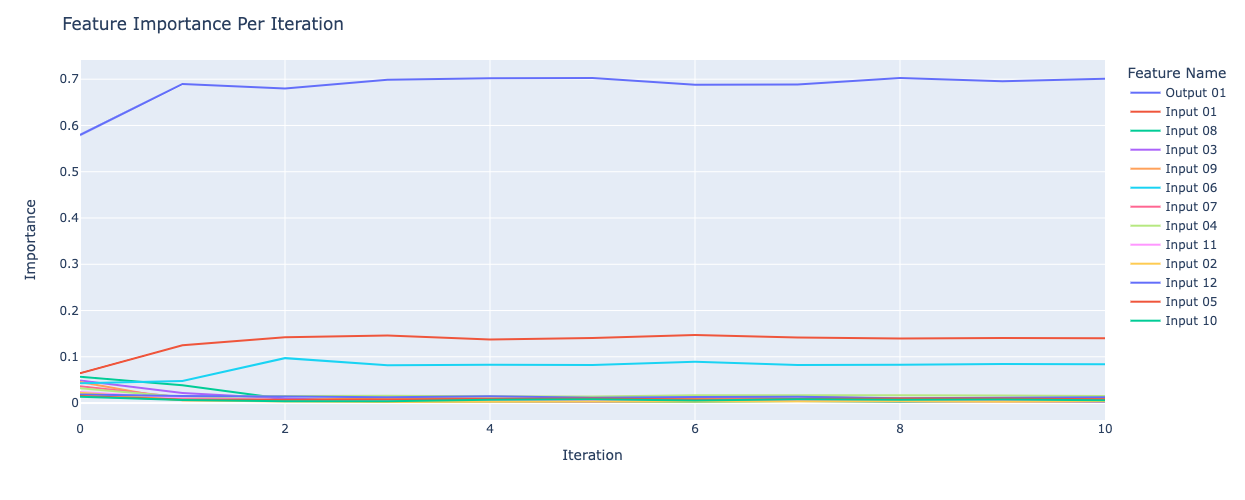

In [12]:
fig = px.line(df_imp, x='Iteration', y="Importance", color = "Feature Name")

fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title_text=f"Feature Importance Per Iteration",
    #paper_bgcolor='#2d3035',
    #plot_bgcolor='#2d3035', 
)

fig.show()